# Statistics

In [0]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import sympy

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:
def calc_mean(nums):
  return sum(nums)/len(nums)

def calc_variance(nums):
  mean = calc_mean(nums)
  return sum([(num - mean)**2 for num in nums])/len(nums)

def calc_stdev(nums):
  return calc_variance(nums)**(0.5)

In [24]:
sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]

sales_mean = calc_mean(sales)
sales_variance = calc_variance(sales)
sales_stdev = calc_stdev(sales)

print('Mean: ' + str(sales_mean))
print('Variance: ' + str(sales_variance))
print('Stanndard deviation: ' + str(sales_stdev))

Mean: 3052.714285714286
Variance: 183761.06122448976
Stanndard deviation: 428.67360686714756


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [0]:
customers =  [127, 80, 105, 92, 120, 115, 93]

In [14]:
df = pd.DataFrame({'sales': sales, 'customers': customers})
df

,sales,customers
0,3505,127
1,2400,80
2,3027,105
3,2798,92
4,3700,120
5,3250,115
6,2689,93


In [36]:
df.cov()

,sales,customers
sales,214387.904762,7604.357143
customers,7604.357143,290.952381


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [0]:
#Use pandas methods for mean and std which uses n-1 instead of custom function above which uses n
cust_stdev = df.customers.std()
cust_mean = df.customers.mean()

sales_stdev = df.sales.std()
sales_mean = df.sales.mean()

In [0]:
covar = 7604.357143

In [38]:
r = covar	/ (cust_stdev * sales_stdev)
r

0.962833977832979

In [27]:
df.corr()

,sales,customers
sales,1.000000,0.962834
customers,0.962834,1.000000


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [43]:
url = 'https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv'
df = pd.read_csv(url)
df.drop(columns = 'Unnamed: 0', inplace=True)
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [45]:
df.cov()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
pclass,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [46]:
df.corr()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
pclass,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

A synonym for orthogonal is perpendicular

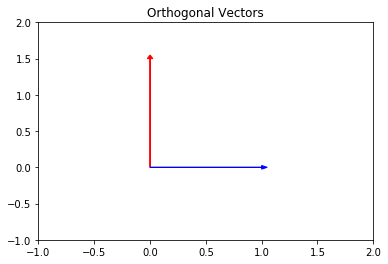

In [58]:
vector_1 = [0, 1.5]
vector_2 = [1, 0]

# Plot the Scaled Vectors
plt.arrow(0,0, vector_1[0], vector_1[1],head_width=.05, head_length=0.05, color ='red')
plt.arrow(0,0, vector_2[0], vector_2[1],head_width=.05, head_length=0.05, color ='blue')
plt.xlim(-1,2)          
plt.ylim(-1,2)
plt.title("Orthogonal Vectors")
plt.show()

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [60]:
a = np.array([-5, 3, 7])
b = np.array([6, -8, 2])

a_dot_b = np.dot(a,b)
a_dot_b

-40

Since the dotproduct of these vectors does not equal zero, they are not orthogonal

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [63]:
c = np.array([2, -15, 6, 20])

c_norm_squared = np.linalg.norm(c)**2
c_dot_c = np.dot(c, c)
cT_c = np.matmul(np.transpose(c), c)

print('c norm squared: ' + str(c_norm_squared))
print('c dot c: ' + str(c_dot_c))
print('c Transpose c: ' + str(cT_c))

c norm squared: 665.0
c dot c: 665
c Transpose c: 665


# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

Your text here

d = 7* [1, 0] + 12*[0, 1]

e = i hate Latex


## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [64]:
f = np.array([4, 12, 11, 9, 2])
f_norm = np.linalg.norm(f)
f_norm

19.131126469708992

In [66]:
#unit vector: divide by its norm
f_hat = f / f_norm
f_hat

array([0.20908335, 0.62725005, 0.57497921, 0.47043754, 0.10454167])

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

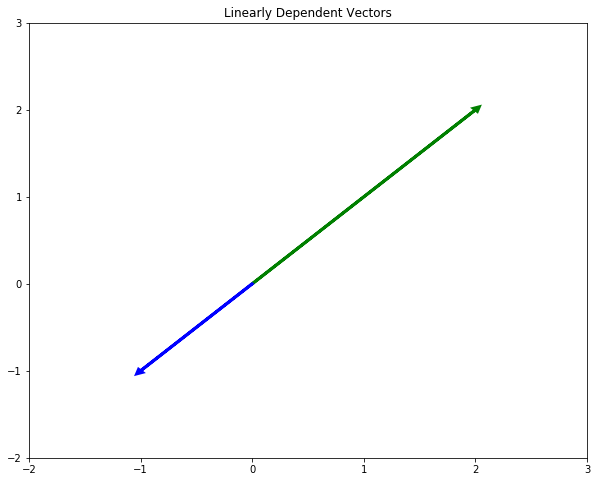

In [70]:
# Plot Linearly Dependent Vectors
fig = plt.figure(figsize=(10,8))
v1 = [2,2] 
v2 = [-1,-1]
plt.arrow(0,0, v1[0], v1[1], linewidth=3, head_width=.05, head_length=0.05, color ='green')
plt.arrow(0,0, v2[0], v2[1], linewidth=3, head_width=.05, head_length=0.05, color ='blue')
plt.xlim(-2,3)          
plt.ylim(-2,3)
plt.title("Linearly Dependent Vectors")
plt.show()

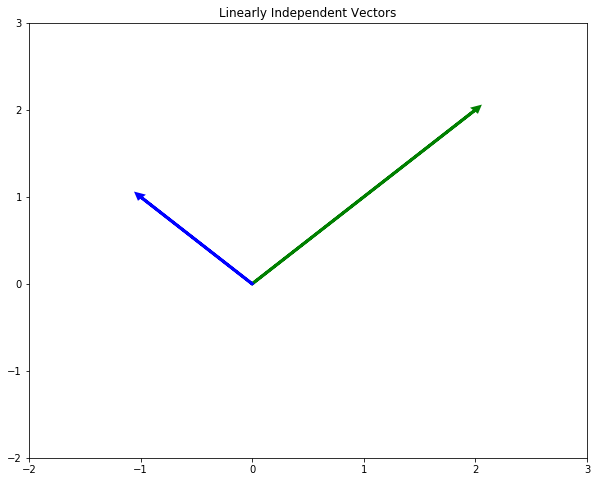

In [71]:
# Plot Linearly Independent Vectors
fig = plt.figure(figsize=(10,8))
v1 = [2,2] 
v2 = [-1,1]
plt.arrow(0,0, v1[0], v1[1], linewidth=3, head_width=.05, head_length=0.05, color ='green')
plt.arrow(0,0, v2[0], v2[1], linewidth=3, head_width=.05, head_length=0.05, color ='blue')
plt.xlim(-2,3)          
plt.ylim(-2,3)
plt.title("Linearly Independent Vectors")
plt.show()

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

Linearly Dependent Vectors

Two vectors that live on the same line are what's called linearly dependent. This means that there is no linear combination (no way to add, or subtract scaled version of these vectors from each other) that will ever allow us to create a vector that lies outside of that line. 

In this case, the span of these vectors (lets say the green one and the red one for example - could be just those two or a whole set) is the line that they lie on, since that's what can be produced by scaling and composing them together.

The span is the graphical area that we're able to cover via a linear combination of a set of vectors.

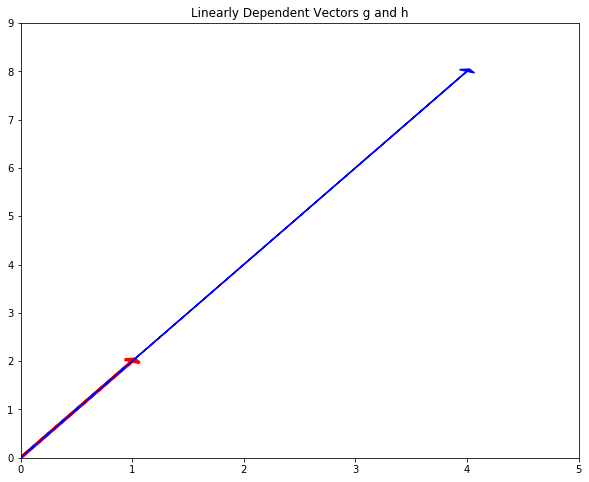

In [89]:
# Plot of these Linearly Dependent Vectors
fig = plt.figure(figsize=(10,8))
g = [1,2] 
h = [4,8]
plt.arrow(0,0, g[0], g[1], linewidth=3, head_width=.15, head_length=0.05, color ='red')
plt.arrow(0,0, h[0], h[1], linewidth=1.5, head_width=.15, head_length=0.05, color ='blue')
plt.xlim(0,5)          
plt.ylim(0,9)
plt.title("Linearly Dependent Vectors g and h")
plt.show()

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

You can take the vectors to form a matrix and check its determinant. If the determinant is non zero, then the vectors are linearly independent.

In [90]:
M = np.matrix('1 2 3; -1 0 -7; 4 8 2')
np.linalg.det(M)

-19.999999999999996

Since they are linearly independent, these vectors span all of R3

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



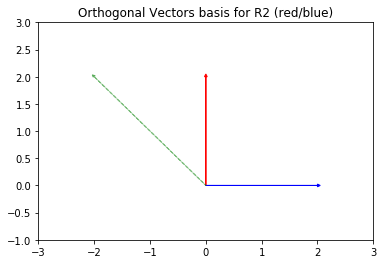

In [83]:
vector_1 = [0, 2]
vector_2 = [2, 0]
v_3 = [-2, 2]

# Plot the Scaled Vectors
plt.arrow(0,0, vector_1[0], vector_1[1], head_width=.05, head_length=0.05, color ='red')
plt.arrow(0,0, vector_2[0], vector_2[1],head_width=.05, head_length=0.05, color ='blue')
plt.arrow(0,0, v_3[0], v_3[1], head_width=.05, head_length=0.05, color ='green', 
          linestyle='--', alpha=.5)
plt.xlim(-3,3)          
plt.ylim(-1,3)
plt.title("Orthogonal Vectors basis for R2 (red/blue)")
plt.show()

The green vector can be given in terms of the basis vectors, so it is linearly dependent upon them

## 6.2 What does it mean to form a basis?

To form a basis means that all of the vector space can be spanned by composing scaled vectors from a  set of linearly independent vectors (these linearly independent vectors form the basis of that vector space).


# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [0]:
P = np.matrix('1 2 3; -1 0 7; 4 8 2')

In [73]:
 sympy.Matrix(P).rref() 

(Matrix([
 [1, 0, 0],
 [0, 1, 0],
 [0, 0, 1]]), (0, 1, 2))

Rank 3

## 7.2 What does the rank of a matrix tell us?

The rank of a matrix tells us the number of dimensions of the vector space that are spanned by its columns. 

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

In [0]:
v = np.array([1, 3]) 
w = np.array([-1,2])
w_dot_v = np.dot(w, v)
v_dot_v = np.dot(v, v)


In [100]:
projL_w = (w_dot_v / v_dot_v) * v

projL_w

array([0.5, 1.5])

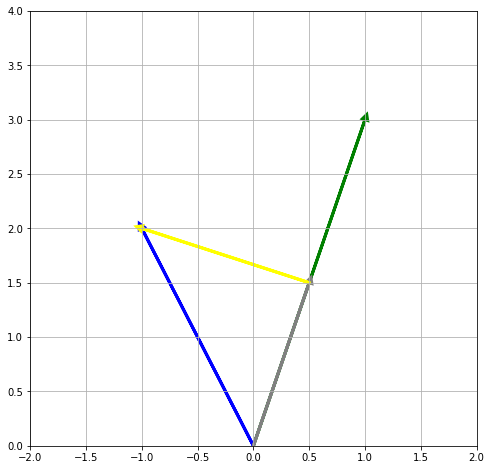

In [107]:
fig = plt.figure(figsize=(8,8))
#v
plt.arrow(0,0, v[0], v[1], linewidth=3, head_width=.05, head_length=0.05, color ='green')
#w
plt.arrow(0,0, w[0], w[1], linewidth=3, head_width=.05, head_length=0.05, color ='blue')
#projL_w
plt.arrow(0,0, projL_w[0], projL_w[1], linewidth=3, head_width=.05, head_length=0.05, color ='gray')
#orthogonal line
plt.arrow(projL_w[0], projL_w[1], -1.5, 0.5, linewidth=3, head_width=.05, head_length=0.05, color ='yellow')

plt.xlim(-2,2)          
plt.ylim(0,4)
plt.grid()
plt.show()

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

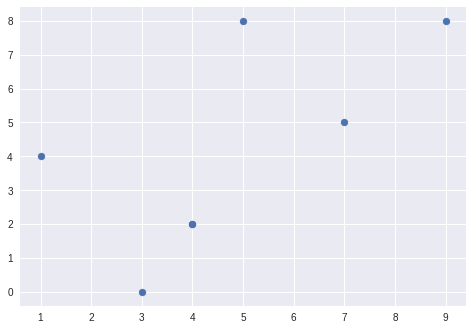

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()